In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
dataset=pd.read_csv('/content/portu_banking_final.csv')
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
dataset.shape

(41188, 21)

In [ ]:
dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

the ratio of the class here is 4640:36548 which clearly indicates that the y classes are not balanced

In [ ]:
#pull out the statictical features of the data
dataset.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

a quick view of the dataset's info reveals that they are 41188 rows and 21 columns. Also it can be noted that all features have 41188 non-null values
 

In [ ]:
#just a confirmation that null values do not exist in the dataset
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
#pulling out the y column
dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

The y column here represents the dependent variable to be predicted.That is in our case the y column indicates which customers will open a term deposit


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7ea85ad0>,
      dtype=object)

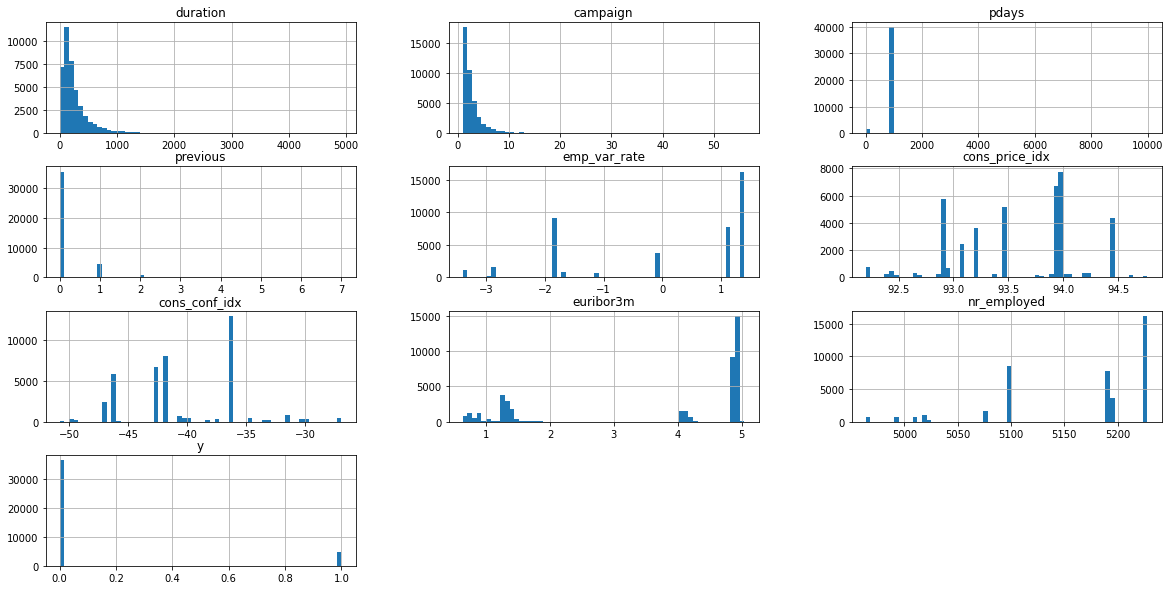

In [ ]:
#graphical visualisation of the relationship existing between different features of the dataset
dataset.hist(bins=60,figsize=(20,10))

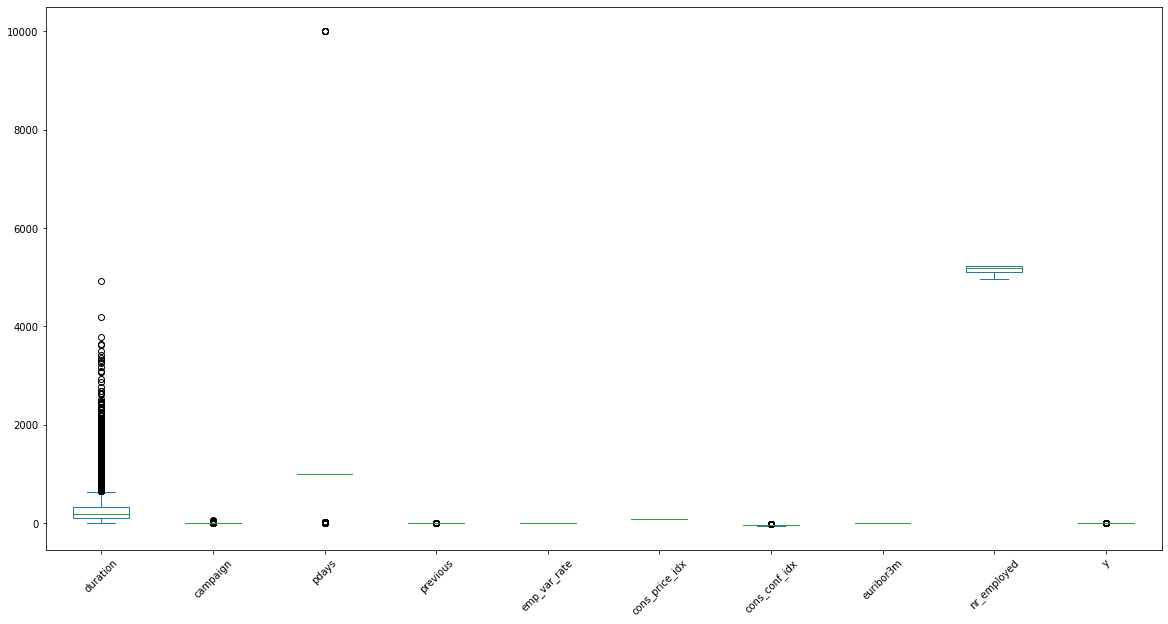

In [ ]:

#now let us take a look at the possible outliers in the dataset
dataset.plot(kind='box', figsize=(20,10))
plt.xticks(rotation=45)
plt.show()


some outliers can be observed from some columns in the dataset.


In [ ]:
#identify the dtype of the all columns in the dataset
dataset.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
#dropirrelevant columns
dataset.drop(['default','poutcome','contact'],axis=1, inplace=True)

In [ ]:
#explore marital column for errors
dataset['marital'].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [ ]:
dataset['marital']=dataset['marital'].replace({'M':'married','S':'single','D':'divorced','unknown':'married'})

In [ ]:
dataset['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
#explore job column for errors
dataset['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [ ]:
dataset['job']=dataset['job'].replace({'blue-collar':'BLUE-COLLAR','technician':'TECHNICIAN','management':'MANAGEMENT','services':'SERVICES','retired':'RETIRED','entrepreneur':'MANAGEMENT','admin.':'ADMIN','housemaid':'HOUSEMAID','unknown':'UNKNOWN','UNKNOWN':'unemployed','student':'STUDENT'})


In [ ]:
dataset['job'].unique()

array(['BLUE-COLLAR', 'TECHNICIAN', 'MANAGEMENT', 'SERVICES', 'RETIRED',
       'ADMIN', 'HOUSEMAID', 'unemployed', 'self-employed', 'UNKNOWN',
       'STUDENT', 'ADMIN.'], dtype=object)

In [ ]:
#explore age column for errors
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
dataset['age']=dataset['age'].replace({'35-30':'33','30-35':'33','25-30':'28','18-25':'22','30-32':'31','50-55':'53','45-50':'48','20-25':'23','20-40':'30','35-40':'38','30-40':'35'})

In [ ]:
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '22', '70', '76', '73',
       '66', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27, 28, 32,
       51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54,
       40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [ ]:
#explore education column for errors
dataset['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [ ]:
dataset['education']=dataset['education'].replace({'basic.4y':'basic-4y','unknown':'illiterate','basic.9y':'basic-9y','basic.6y':'basic-6y'})
dataset['education'].unique()

array(['basic-4y', 'illiterate', 'university.degree', 'high.school',
       'basic-9y', 'professional.course', 'basic-6y'], dtype=object)

In [ ]:
#explore housing columns for errors
dataset['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [ ]:
dataset['housing']=dataset['housing'].replace('unknown','yes')
dataset['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
#explore loan columns for errors
dataset['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
dataset['loan']=dataset['loan'].replace('unknown','no')
dataset['loan'].unique()

array(['no', 'yes'], dtype=object)

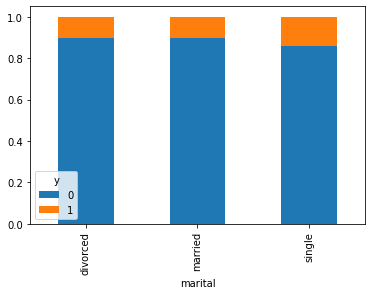

In [ ]:
m = pd.crosstab(dataset['marital'], dataset['y'])
m.div(m.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:
#now let us label encode all columns with meaningful information
dataset['month']=encode.fit_transform(dataset['month'])
dataset['day_of_week']=encode.fit_transform(dataset['day_of_week'])
dataset['job']=encode.fit_transform(dataset['job'])
dataset['education']=encode.fit_transform(dataset['education'])
dataset['marital']=encode.fit_transform(dataset['marital'])



In [ ]:
#let us print the new dataset after all the cleaning is done
dataset.head(10)

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,1,0,yes,no,1,2,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,8,1,4,no,no,7,0,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,yes,no,4,2,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,6,1,3,no,no,0,0,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,yes,no,1,0,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,4,0,0,yes,no,3,3,68,8,999.0,0,1.4,93.918,-42.7,4.961,5228.1,0
6,37,2,1,0,yes,no,6,2,204,1,999.0,0,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,2,0,2,yes,no,6,0,191,1,999.0,0,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,0,1,6,no,no,4,1,174,1,3.0,1,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,2,2,0,yes,no,0,2,191,2,9999.0,1,-1.8,93.075,-47.1,1.410,5099.1,0


In [ ]:
#grouping the data by their mean
dataset['job'].mean(),dataset['marital'].mean(),dataset['education'].mean(),dataset['y'].mean()

(3.8853306788384967,
 1.1688841410119453,
 3.6211032339516365,
 0.11265417111780131)

In [ ]:
dataset.groupby('y').mean()

,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,,,,
0,3.867435,1.159024,3.581701,4.235882,1.996662,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,4.026293,1.246552,3.931466,4.191379,2.067241,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


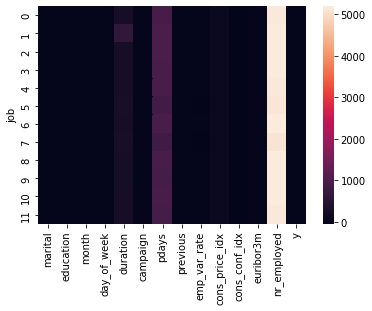

In [ ]:
data_job=dataset.groupby('job').mean()
data_job
sns.heatmap(data_job)

In [ ]:
dataset.groupby('marital').mean()

,job,education,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,,,,
0,3.897875,3.676062,4.278187,2.017997,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
1,3.865163,3.370481,4.233765,1.996241,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
2,3.923928,4.140992,4.205740,2.017376,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


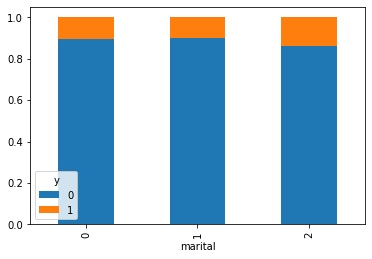

In [ ]:
m = pd.crosstab(dataset['marital'], dataset['y'])
m.div(m.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked=True)

In [ ]:
dataset.groupby('education').mean()

,job,marital,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,,,,
0,3.366619,0.991379,4.289990,2.062021,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
1,3.075480,1.067627,4.594241,2.084206,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
2,3.370554,1.124235,4.558644,2.004467,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
3,3.754388,1.205675,4.386442,1.991697,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
4,4.436249,1.167524,4.178388,1.892510,262.538593,2.592910,942.841052,0.225272,0.057118,93.655102,-39.878559,3.570536,5159.675357,0.145798
5,6.618920,1.146290,4.007248,2.011825,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
6,3.316979,1.252219,3.961538,1.993097,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245


In [ ]:
#creating dummy variables for categorical features(loan,housing)
loan_dummy=pd.get_dummies(dataset.loan,prefix='loan')
loan_dummy

,loan_no,loan_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41183,0,1
41184,1,0
41185,0,1
41186,0,1


In [ ]:
housing_dummy=pd.get_dummies(dataset.housing,prefix='housing')
housing_dummy

,housing_no,housing_yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
41183,1,0
41184,1,0
41185,0,1
41186,1,0


In [ ]:
#new dataset with dummies
dataset=pd.concat([dataset,loan_dummy,housing_dummy], axis=1)
dataset.head()


,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,...,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,loan_no,loan_yes,housing_no,housing_yes
0,44,2,1,0,yes,no,1,2,210,1,...,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,1
1,53,8,1,4,no,no,7,0,138,1,...,-0.1,93.200,-42.0,4.021,5195.8,0,1,0,1,0
2,28,4,2,6,yes,no,4,2,339,3,...,-1.7,94.055,-39.8,0.729,4991.6,1,1,0,0,1
3,39,6,1,3,no,no,0,0,185,2,...,-1.8,93.075,-47.1,1.405,5099.1,0,1,0,1,0
4,55,5,1,0,yes,no,1,0,137,1,...,-2.9,92.201,-31.4,0.869,5076.2,1,1,0,0,1


In [ ]:
corr=dataset.corr()
corr

,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,loan_no,loan_yes,housing_no,housing_yes
job,1.000000,0.004747,0.080773,-0.016001,-0.003472,-0.003074,-0.006077,-0.018547,0.010932,-0.003870,-0.008350,0.038617,-0.001052,-0.010339,0.015251,0.014129,-0.014129,-0.005934,0.005934
marital,0.004747,1.000000,0.114346,-0.008824,0.002473,0.009030,-0.008745,-0.029326,0.037703,-0.083709,-0.056822,-0.033639,-0.091604,-0.086099,0.045849,-0.006483,0.006483,-0.011312,0.011312
education,0.080773,0.114346,1.000000,-0.086015,-0.013922,-0.016907,-0.000252,-0.038177,0.034214,-0.045252,-0.094952,0.074677,-0.036554,-0.037297,0.054570,-0.010866,0.010866,-0.018516,0.018516
month,-0.016001,-0.008824,-0.086015,1.000000,0.027677,0.003690,-0.062059,-0.047230,0.103157,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065,0.007073,-0.007073,0.017006,-0.017006
day_of_week,-0.003472,0.002473,-0.013922,0.027677,1.000000,0.021950,-0.038288,-0.009167,-0.004102,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967,0.009483,-0.009483,-0.003348,0.003348
duration,-0.003074,0.009030,-0.016907,0.003690,0.021950,1.000000,-0.071699,-0.044035,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274,-0.000121,0.000121,0.008334,-0.008334
campaign,-0.006077,-0.008745,-0.000252,-0.062059,-0.038288,-0.071699,1.000000,0.045353,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357,-0.005294,0.005294,0.010959,-0.010959
pdays,-0.018547,-0.029326,-0.038177,-0.047230,-0.009167,-0.044035,0.045353,1.000000,-0.518260,0.241416,0.070331,-0.082578,0.263918,0.331380,-0.288609,-0.000619,0.000619,0.010474,-0.010474
previous,0.010932,0.037703,0.034214,0.103157,-0.004102,0.020640,-0.079141,-0.518260,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181,0.002143,-0.002143,-0.021677,0.021677
emp_var_rate,-0.003870,-0.083709,-0.045252,-0.178782,0.033245,-0.027968,0.150754,0.241416,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334,-0.001193,0.001193,0.059100,-0.059100


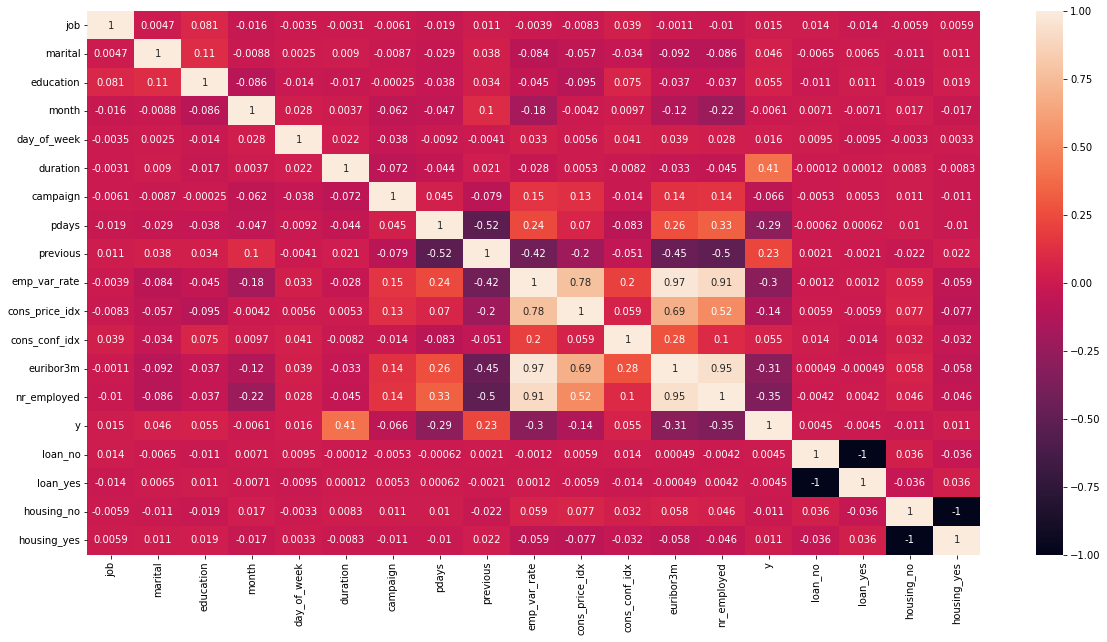

In [ ]:
#plot a correlation graph between variables
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#importing logistic regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix

In [ ]:
y=dataset['y']
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
x=dataset.loc[:,['age','job', 'marital', 'education', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'loan_no', 'loan_yes', 'housing_no', 'housing_yes']]
x

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,loan_no,loan_yes,housing_no,housing_yes
0,44,2,1,0,1,2,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,1
1,53,8,1,4,7,0,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,1,0,1,0
2,28,4,2,6,4,2,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1
3,39,6,1,3,0,0,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,1,0,1,0
4,55,5,1,0,1,0,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,3,4,2,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,0,1,1,0
41184,31,3,1,0,6,2,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,1,0,1,0
41185,42,0,2,6,6,4,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1
41186,48,8,1,5,8,3,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,0,1,1,0


In [ ]:
dataset.age=dataset.age.astype('int64')

In [ ]:
dataset.dtypes

age                 int64
job                 int64
marital             int64
education           int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays             float64
previous            int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
loan_no             uint8
loan_yes            uint8
housing_no          uint8
housing_yes         uint8
dtype: object

In [ ]:
# splitting the dataset into train and test at 80%:20% ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
#training and fitting the model
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions=model.predict(x_test)
print(predictions)

[0 0 0 ... 1 0 0]


In [ ]:
print(model.score(x_test,y_test))

0.9127215343529983


In [ ]:
print(classification_report(y_test,predictions))#every other factors kept constant,an accuracy of 0.91 is favarable for the model

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7336
           1       0.66      0.41      0.51       902

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
#confusion matrix before resampling
print(confusion_matrix(y_test,predictions))

[[7145  191]
 [ 528  374]]


In [ ]:
dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

because the two classes are imbalanced, we need to balance them for better results


In [ ]:
#applying smote balancing technic
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
x_resampled, y_resampled=smote.fit_resample(x_train,y_train)

In [ ]:
y_resampled.value_counts()

0    29212
1    29212
Name: y, dtype: int64

In [ ]:
model_res=LogisticRegression()
model_res.fit(x_resampled,y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#checking on the performace of the new sample
predictions_res=model_res.predict(x_resampled)
print(predictions)

[0 0 0 ... 1 0 0]


In [ ]:
print(classification_report(y_resampled,predictions_res))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     29212
           1       0.85      0.88      0.87     29212

    accuracy                           0.87     58424
   macro avg       0.87      0.87      0.87     58424
weighted avg       0.87      0.87      0.87     58424



the new accuracy score after resampling the data is 0.87 but the recalls have considerable change and the sample is now balanced



In [ ]:
#generate the confusion matrix after resampling
print(confusion_matrix(y_resampled,predictions_res))

[[24821  4391]
 [ 3412 25800]]
